In [1]:
!pip install pynwb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.5/338.5 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.2/722.2 kB 12.3 MB/s eta 0:00:00


In [2]:
from pynwb import NWBHDF5IO

# Load NWB file
io = NWBHDF5IO('/content/drive/MyDrive/MLNBD/ML_Neuro/Original_Data/sub-Jenkins_ses-small_desc-train_behavior+ecephys.nwb', 'r')
nwbfile = io.read()


/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [3]:

# Access behavior data
hand_pos = nwbfile.processing['behavior'].data_interfaces['hand_pos']
hand_vel = nwbfile.processing['behavior'].data_interfaces['hand_vel']
eye_pos = nwbfile.processing['behavior'].data_interfaces['eye_pos']
trials = nwbfile.intervals['trials']



In [4]:
import numpy as np

trial_data = []
for trial_idx in range(len(trials)):
    # Extract trial-specific information
    start_time = trials['start_time'][trial_idx]
    stop_time = trials['stop_time'][trial_idx]
    target_pos = trials['target_pos'][trial_idx]
    barrier_pos = trials['barrier_pos'][trial_idx]

    # Filter data for this trial interval
    trial_hand_pos = hand_pos.data[np.logical_and(
        hand_pos.timestamps >= start_time,
        hand_pos.timestamps <= stop_time
    )]
    trial_hand_vel = hand_vel.data[np.logical_and(
        hand_vel.timestamps >= start_time,
        hand_vel.timestamps <= stop_time
    )]
    trial_eye_pos = eye_pos.data[np.logical_and(
        eye_pos.timestamps >= start_time,
        eye_pos.timestamps <= stop_time
    )]

    # Store trial data
    trial_data.append({
        "trial_id": trial_idx,
        "start_time": start_time,
        "stop_time": stop_time,
        "hand_pos": trial_hand_pos.tolist(),
        "hand_vel": trial_hand_vel.tolist(),
        "eye_pos": trial_eye_pos.tolist(),
        "target_pos": target_pos.tolist(),
        "barrier_pos": barrier_pos.tolist()
    })


In [5]:
trial_data[0].keys()

dict_keys(['trial_id', 'start_time', 'stop_time', 'hand_pos', 'hand_vel', 'eye_pos', 'target_pos', 'barrier_pos'])

In [6]:
units = nwbfile.units  # Access the units table
spike_times = units['spike_times']  # Spike times for each unit
obs_intervals = units['obs_intervals']  # Observation intervals for each unit


In [7]:
trial_spike_data = []

for trial_idx in range(len(trials)):
    # Get trial start/stop time
    start_time = trials['start_time'][trial_idx]
    stop_time = trials['stop_time'][trial_idx]

    # Filter spike times for this trial
    trial_spikes = []
    for unit_idx in range(len(units)):
        # Get spike times for this unit
        unit_spike_times = spike_times[unit_idx]

        # Filter spike times within the trial interval
        trial_unit_spikes = unit_spike_times[
            (unit_spike_times >= start_time) & (unit_spike_times <= stop_time)
        ]

        # Append the unit-specific spikes for this trial
        trial_spikes.append(trial_unit_spikes.tolist())

    # Store trial-level spike data
    trial_spike_data.append({
        "trial_id": trial_idx,
        "start_time": start_time,
        "stop_time": stop_time,
        "spike_data": trial_spikes  # List of spike times for all units
    })


In [8]:
import json
for i, trial in enumerate(trial_data):
    trial['spike_data'] = trial_spike_data[i]['spike_data']

# # Save combined data
# with open('/content/drive/MyDrive/MLNBD/ML_Neuro/DATA ANALYTICS/trajectory_with_spike_data.json', 'w') as f:
#     json.dump(trial_data, f)


In [12]:
trial_data[0]["spike_data"]

[[1.772667, 1.7856, 1.8769, 1.937967, 2.031967, 2.125233, 2.167133],
 [1.538567,
  1.602067,
  1.6495,
  1.688067,
  1.770133,
  1.819467,
  1.9063,
  1.9823,
  2.030167,
  2.0343,
  2.064067,
  2.073633,
  2.116433],
 [1.963067,
  2.177233,
  2.273067,
  2.307833,
  2.393833,
  2.464967,
  2.770633,
  2.774367],
 [1.841767],
 [0.733533, 0.964933, 1.3119, 2.8374, 2.908733],
 [1.6194],
 [0.788867, 0.817967, 0.9179, 1.7485, 1.787567, 1.8023, 1.829533, 1.950333],
 [],
 [2.259233, 2.489667, 2.790133],
 [0.099833, 0.137967, 0.1774, 0.239567, 0.545067, 0.592167, 0.703, 1.211933],
 [0.432033,
  0.434733,
  0.589667,
  0.6149,
  0.646867,
  0.677567,
  0.732667,
  0.7544,
  0.763367,
  0.787667,
  0.806467,
  0.8566,
  0.897233,
  0.908367,
  0.928167,
  0.955667,
  1.571433,
  1.574,
  1.750267,
  1.759967,
  1.846167,
  1.856733,
  1.9249,
  1.955533,
  1.970367,
  2.028567,
  2.046333,
  2.253433,
  2.304033,
  2.372067,
  2.407567,
  2.414633,
  2.4635,
  2.5028,
  2.518467,
  2.5858,
  2.

In [ ]:
!pip install filterpy
  # Install scikit-learn to install datasets as dependencies

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110458 sha256=d9a5da1482f0d4f35587f8e30f586e0799b8250b8be0a3f5e59425a14a8f581b
  Stored in directory: /root/.cache/pip/wheels/0f/0c/ea/218f266af4ad626897562199fbbcba521b8497303200186102
Successfully built filterpy


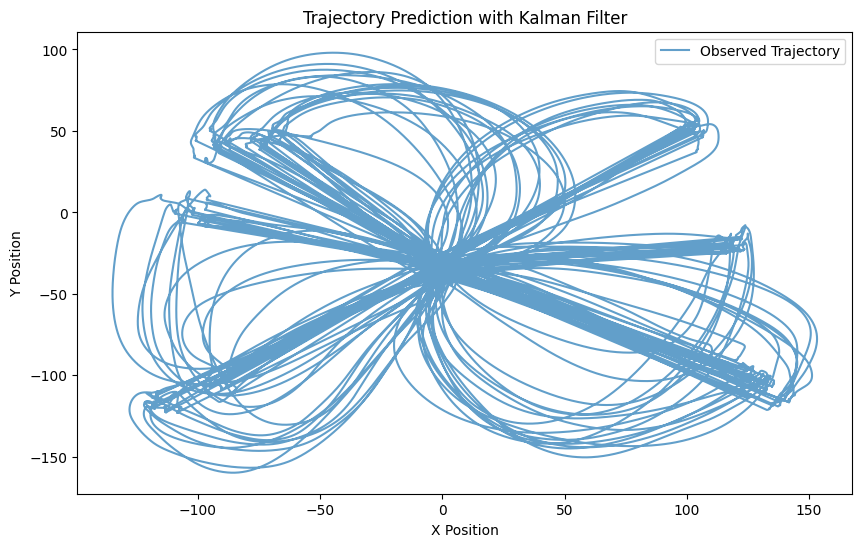

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter

# Preprocess data: Extract hand positions from unfiltered data
def preprocess_hand_pos(unfiltered_data):
    # Extract observations (e.g., hand_pos from trials)
    observations = []
    for trial in unfiltered_data:
        hand_pos = np.array(trial.get("hand_pos", []))  # Extract hand positions
        if hand_pos.shape[0] > 0:  # Skip trials with no data
            observations.append(hand_pos)
    return np.concatenate(observations, axis=0)  # Combine all trials into one array

# Load unfiltered data (replace with your actual JSON file path)
import json
with open("/content/drive/MyDrive/MLNBD/ML_Neuro/DATA ANALYTICS/trajectory_with_spike_data.json", "r") as f:
    unfiltered_data = json.load(f)

# Extract hand positions
observations = preprocess_hand_pos(unfiltered_data)

# Initialize Kalman Filter
kf = KalmanFilter(dim_x=2, dim_z=2)  # State and observation dimensions (e.g., x, y)

# Define Kalman Filter matrices
kf.F = np.eye(2)  # Transition matrix
kf.H = np.eye(2)  # Observation matrix
kf.P = np.eye(2) * 500  # Covariance matrix
kf.R = np.eye(2) * 5    # Measurement noise
kf.Q = np.eye(2) * 0.1  # Process noise

# Initial state
kf.x = np.zeros(2)

# Apply the filter to smooth data
smoothed_states = []
for obs in observations:
    kf.predict()
    kf.update(obs)
    smoothed_states.append(kf.x.copy())

smoothed_states = np.array(smoothed_states)

# Predict future states
future_steps = 50
predicted_states = []
current_state = kf.x.copy()

for _ in range(future_steps):
    kf.predict()
    predicted_states.append(kf.x.copy())

predicted_states = np.array(predicted_states)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(observations[:, 0], observations[:, 1], label="Observed Trajectory", alpha=0.7)
# plt.plot(smoothed_states[:, 0], smoothed_states[:, 1], label="Smoothed Trajectory", alpha=0.7)
# plt.plot(predicted_states[:, 0], predicted_states[:, 1], label="Predicted Trajectory", linestyle="--")
plt.legend()
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Trajectory Prediction with Kalman Filter")
plt.show()


Mean Squared Error on Test Set: 7264.5929


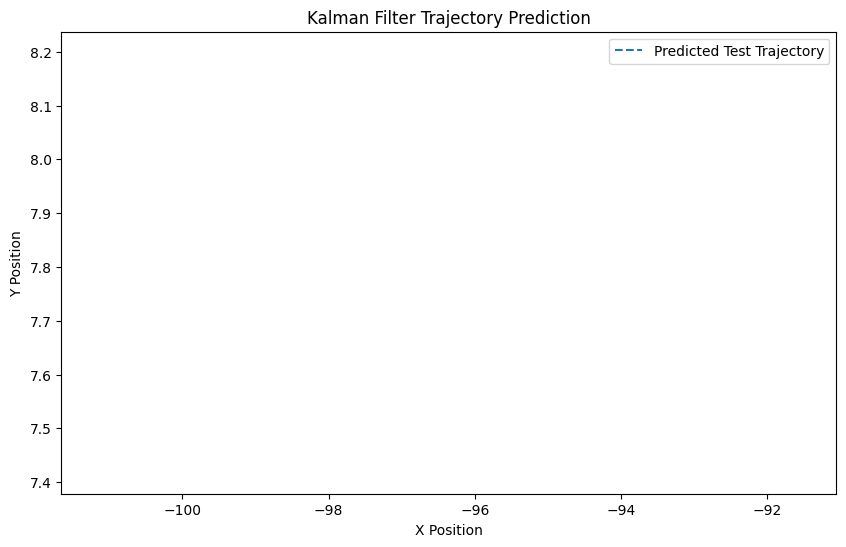

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter
from sklearn.metrics import mean_squared_error

# Function to group data by trial IDs and times
def group_data_by_trials(unfiltered_data):
    trials = []
    for trial in unfiltered_data:
        trial_id = trial.get("trial_id", None)  # Extract trial ID
        start_time = trial.get("start_time", None)  # Extract start time
        hand_pos = np.array(trial.get("hand_pos", []))  # Extract hand positions

        if trial_id is not None and start_time is not None and hand_pos.shape[0] > 0:
            trials.append({
                "trial_id": trial_id,
                "start_time": start_time,
                "hand_pos": hand_pos
            })
    return sorted(trials, key=lambda x: x["start_time"])  # Sort by start time

# Load unfiltered data (replace with your actual JSON file path)
import json
with open("/content/drive/MyDrive/MLNBD/ML_Neuro/DATA ANALYTICS/trajectory_with_spike_data.json", "r") as f:
    unfiltered_data = json.load(f)

# Group and sort trials by time
trials = group_data_by_trials(unfiltered_data)

# Split into train and test sets based on trial count
split_ratio = 0.8
split_idx = int(len(trials) * split_ratio)

train_trials = trials[:split_idx]
test_trials = trials[split_idx:]

# Combine data from train and test trials
train_data = np.concatenate([trial["hand_pos"] for trial in train_trials], axis=0)
test_data = np.concatenate([trial["hand_pos"] for trial in test_trials], axis=0)

# Initialize Kalman Filter
kf = KalmanFilter(dim_x=2, dim_z=2)  # State and observation dimensions (e.g., x, y)

# Define Kalman Filter matrices
kf.F = np.eye(2)  # Transition matrix
kf.H = np.eye(2)  # Observation matrix
kf.P = np.eye(2) * 500  # Covariance matrix
kf.R = np.eye(2) * 5    # Measurement noise
kf.Q = np.eye(2) * 0.1  # Process noise

# Initial state
kf.x = np.zeros(2)

# Train on the training set
smoothed_train_states = []
for obs in train_data:
    kf.predict()
    kf.update(obs)
    smoothed_train_states.append(kf.x.copy())

# Validate on the test set
predicted_test_states = []
for obs in test_data:
    kf.predict()
    predicted_test_states.append(kf.x.copy())  # Predict without updating

predicted_test_states = np.array(predicted_test_states)

# Compute error metrics
mse = mean_squared_error(test_data, predicted_test_states)
print(f"Mean Squared Error on Test Set: {mse:.4f}")

# Plot results
plt.figure(figsize=(10, 6))
# plt.plot(train_data[:, 0], train_data[:, 1], label="Training Data", alpha=0.7)
# plt.plot(test_data[:, 0], test_data[:, 1], label="Test Data", alpha=0.7)
plt.plot(predicted_test_states[:, 0], predicted_test_states[:, 1], label="Predicted Test Trajectory", linestyle="--")
plt.legend()
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Kalman Filter Trajectory Prediction")
plt.show()


In [ ]:
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)
print("First Train Observation:", train_data[0])
print("First Test Observation:", test_data[0])


Train Data Shape: (229420, 2)
Test Data Shape: (58290, 2)
First Train Observation: [ -4.06939146 -31.88889289]
First Test Observation: [  0.96226634 -27.8929647 ]


Train Data Shape: (229420, 2)
Test Data Shape: (58290, 2)
First Predicted State: [-96.35368629   7.80783844]
Mean Squared Error on Test Set: 7264.5929


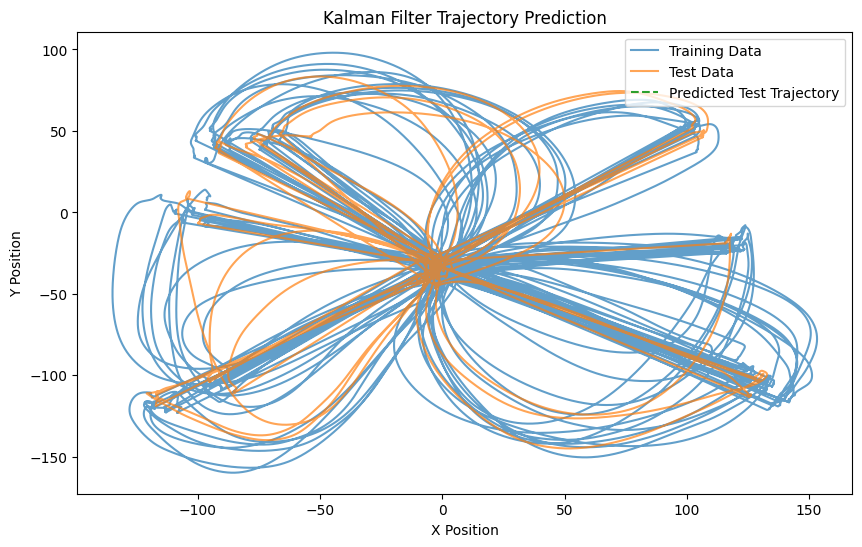

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter
from sklearn.metrics import mean_squared_error

# Function to group data by trial IDs and times
def group_data_by_trials(unfiltered_data):
    trials = []
    for trial in unfiltered_data:
        trial_id = trial.get("trial_id", None)  # Extract trial ID
        start_time = trial.get("start_time", None)  # Extract start time
        hand_pos = np.array(trial.get("hand_pos", []))  # Extract hand positions

        if trial_id is not None and start_time is not None and hand_pos.shape[0] > 0:
            trials.append({
                "trial_id": trial_id,
                "start_time": start_time,
                "hand_pos": hand_pos
            })
    return sorted(trials, key=lambda x: x["start_time"])  # Sort by start time

# Load unfiltered data (replace with your actual JSON file path)
import json
with open("/content/drive/MyDrive/MLNBD/ML_Neuro/DATA ANALYTICS/trajectory_with_spike_data.json", "r") as f:
    unfiltered_data = json.load(f)

# Group and sort trials by time
trials = group_data_by_trials(unfiltered_data)

# Split into train and test sets based on trial count
split_ratio = 0.8
split_idx = int(len(trials) * split_ratio)

train_trials = trials[:split_idx]
test_trials = trials[split_idx:]

# Combine data from train and test trials
train_data = np.concatenate([trial["hand_pos"] for trial in train_trials], axis=0)
test_data = np.concatenate([trial["hand_pos"] for trial in test_trials], axis=0)

# Debug: Verify train and test data
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

# Initialize Kalman Filter
kf = KalmanFilter(dim_x=2, dim_z=2)  # State and observation dimensions (e.g., x, y)

# Define Kalman Filter matrices
kf.F = np.eye(2)  # Transition matrix
kf.H = np.eye(2)  # Observation matrix
kf.P = np.eye(2) * 500  # Covariance matrix
kf.R = np.eye(2) * 5    # Measurement noise
kf.Q = np.eye(2) * 0.1  # Process noise
kf.x = train_data[0]    # Initialize state with the first observation

# Train on the training set
smoothed_train_states = []
for obs in train_data:
    kf.predict()
    kf.update(obs)
    smoothed_train_states.append(kf.x.copy())

# Validate on the test set
predicted_test_states = []
for obs in test_data:
    kf.predict()
    predicted_test_states.append(kf.x.copy())  # Predict without updating

predicted_test_states = np.array(predicted_test_states)

# Debug: Check predicted states
if len(predicted_test_states) > 0:
    print("First Predicted State:", predicted_test_states[0])
else:
    print("No Predicted States")

# Compute error metrics
if len(predicted_test_states) == len(test_data):
    mse = mean_squared_error(test_data, predicted_test_states)
    print(f"Mean Squared Error on Test Set: {mse:.4f}")
else:
    print("Mismatch in predicted and actual test data length")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(train_data[:, 0], train_data[:, 1], label="Training Data", alpha=0.7)
plt.plot(test_data[:, 0], test_data[:, 1], label="Test Data", alpha=0.7)
plt.plot(predicted_test_states[:, 0], predicted_test_states[:, 1], label="Predicted Test Trajectory", linestyle="--")
plt.legend()
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Kalman Filter Trajectory Prediction")
plt.show()


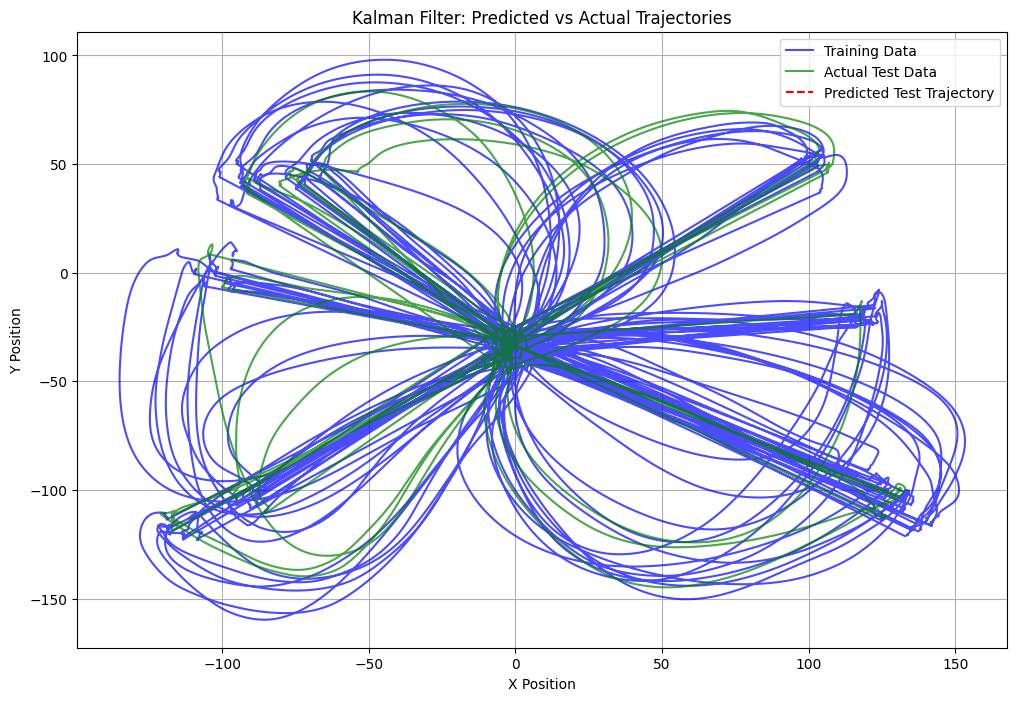

In [ ]:
# Plot results
plt.figure(figsize=(12, 8))

# Plot the training trajectory
plt.plot(train_data[:, 0], train_data[:, 1], label="Training Data", alpha=0.7, color="blue")

# Plot the actual test trajectory
plt.plot(test_data[:, 0], test_data[:, 1], label="Actual Test Data", alpha=0.7, color="green")

# Plot the predicted test trajectory
if len(predicted_test_states) > 0:
    plt.plot(predicted_test_states[:, 0], predicted_test_states[:, 1], label="Predicted Test Trajectory", linestyle="--", color="red")
else:
    print("No predicted states available for plotting.")

# Add labels, legend, and title
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Kalman Filter: Predicted vs Actual Trajectories")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter
from sklearn.metrics import mean_squared_error
import json

# Load the JSON file (replace with the actual file path)
with open("/content/drive/MyDrive/MLNBD/ML_Neuro/DATA ANALYTICS/trajectory_with_spike_data.json", "r") as f:
    data = json.load(f)

# Extract spike data and trajectory (hand_pos) from the JSON
def preprocess_data(data, max_length=None):
    spike_data = []
    trajectory_data = []

    # Determine maximum sequence length if not provided
    if max_length is None:
        max_length = max((len(trial.get("spike_data", [])) for trial in data), default=0)

    for trial_idx, trial in enumerate(data):
        if "spike_data" not in trial or "hand_pos" not in trial:
            print(f"Skipping trial {trial_idx}: Missing 'spike_data' or 'hand_pos'")
            continue

        spikes = trial["spike_data"]
        hand_pos = trial["hand_pos"]

        if not isinstance(spikes, list) or not isinstance(hand_pos, list):
            print(f"Skipping trial {trial_idx}: Invalid data types (spike_data: {type(spikes)}, hand_pos: {type(hand_pos)})")
            continue

        spikes = np.array(spikes, dtype=object)
        hand_pos = np.array(hand_pos, dtype=object)

        if len(spikes) != len(hand_pos):
            print(f"Skipping trial {trial_idx}: Length mismatch (spikes: {len(spikes)}, hand_pos: {len(hand_pos)})")
            continue

        # Pad or truncate to the maximum length
        padded_spikes = np.zeros((max_length, spikes.shape[1]))
        padded_spikes[:len(spikes), :] = spikes

        padded_hand_pos = np.zeros((max_length, hand_pos.shape[1]))
        padded_hand_pos[:len(hand_pos), :] = hand_pos

        spike_data.append(padded_spikes)
        trajectory_data.append(padded_hand_pos)

    # Check if any valid trials were processed
    if not spike_data or not trajectory_data:
        raise ValueError("No valid trials found. Check your data structure.")

    # Concatenate all trials into one array
    return np.concatenate(spike_data, axis=0), np.concatenate(trajectory_data, axis=0)





# Preprocess data
spike_data, trajectory_data = preprocess_data(data)

# Split data into train and test sets (80-20 split)
split_ratio = 0.8
split_idx = int(len(spike_data) * split_ratio)

spike_train = spike_data[:split_idx]
trajectory_train = trajectory_data[:split_idx]
spike_test = spike_data[split_idx:]
trajectory_test = trajectory_data[split_idx:]

# Initialize Kalman Filter
kf = KalmanFilter(dim_x=spike_train.shape[1] + 2, dim_z=2)  # Include spikes and trajectory states

# Define Kalman Filter matrices
kf.F = np.eye(spike_train.shape[1] + 2)  # Transition matrix
kf.H = np.zeros((2, spike_train.shape[1] + 2))  # Observation matrix
kf.H[:, -2:] = np.eye(2)  # Map trajectory state to observed data
kf.P = np.eye(spike_train.shape[1] + 2) * 500  # Covariance matrix
kf.R = np.eye(2) * 5    # Measurement noise
kf.Q = np.eye(spike_train.shape[1] + 2) * 0.1  # Process noise
kf.x = np.zeros(spike_train.shape[1] + 2)  # Initial state

# Train on the training set
smoothed_train_states = []
for i in range(len(spike_train)):
    kf.predict()
    combined_input = np.hstack([spike_train[i], trajectory_train[i]])  # Combine spike and trajectory
    kf.update(combined_input)
    smoothed_train_states.append(kf.x.copy())

# Validate on the test set
predicted_test_states = []
for i in range(len(spike_test)):
    kf.predict()
    predicted_state = kf.x[-2:]  # Extract trajectory predictions
    predicted_test_states.append(predicted_state)

predicted_test_states = np.array(predicted_test_states)

# Compute error metrics
mse = mean_squared_error(trajectory_test, predicted_test_states)
print(f"Mean Squared Error on Test Set: {mse:.4f}")

# Plot results
plt.figure(figsize=(12, 8))
plt.plot(trajectory_train[:, 0], trajectory_train[:, 1], label="Training Trajectory", alpha=0.7, color="blue")
plt.plot(trajectory_test[:, 0], trajectory_test[:, 1], label="Actual Test Trajectory", alpha=0.7, color="green")
plt.plot(predicted_test_states[:, 0], predicted_test_states[:, 1], label="Predicted Test Trajectory", linestyle="--", color="red")
plt.legend()
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Kalman Filter with Neural Data for Trajectory Prediction")
plt.grid(True)
plt.show()


Skipping trial 0: Length mismatch (spikes: 142, hand_pos: 3421)
Skipping trial 1: Length mismatch (spikes: 142, hand_pos: 2131)
Skipping trial 2: Length mismatch (spikes: 142, hand_pos: 2836)
Skipping trial 3: Length mismatch (spikes: 142, hand_pos: 3146)
Skipping trial 4: Length mismatch (spikes: 142, hand_pos: 2906)
Skipping trial 5: Length mismatch (spikes: 142, hand_pos: 2751)
Skipping trial 6: Length mismatch (spikes: 142, hand_pos: 3026)
Skipping trial 7: Length mismatch (spikes: 142, hand_pos: 2951)
Skipping trial 8: Length mismatch (spikes: 142, hand_pos: 3271)
Skipping trial 9: Length mismatch (spikes: 142, hand_pos: 2641)
Skipping trial 10: Length mismatch (spikes: 142, hand_pos: 3336)
Skipping trial 11: Length mismatch (spikes: 142, hand_pos: 3126)
Skipping trial 12: Length mismatch (spikes: 142, hand_pos: 2976)
Skipping trial 13: Length mismatch (spikes: 142, hand_pos: 2356)
Skipping trial 14: Length mismatch (spikes: 142, hand_pos: 2961)
Skipping trial 15: Length mismatch 

ValueError: No valid trials found. Check your data structure.